In [1]:
import uproot
import numpy as np
import glob
import os
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import layers, models, Model
import h5py

from utils import *

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
files_HHbbbb = glob.glob('datasets/merged_HHbbbb_*.root')
files_PJZ0 = glob.glob('datasets/CaloCell_PJZ0_*.root')

data_HHbbbb = []
data_PJZ0 = []
for f in files_HHbbbb:
    file = uproot.open(f)
    tree = file['CaloTree']
    data = tree.arrays(['cell_isHS','cell_et','cell_x','cell_y','cell_z','cell_sampling'],
                       library="np")
    data_HHbbbb.append(data)
    file.close()

for f in files_PJZ0:
    file = uproot.open(f)
    tree = file['CaloTree']
    data = tree.arrays(['cell_et','cell_x','cell_y','cell_z','cell_sampling'],
                       library="np")
    data_PJZ0.append(data)
    file.close()

#for branch, array in data_HHbbbb[0].items():
#    print(f"{branch}")

In [3]:
X_HHbbbb_isHS = []
X_HHbbbb_isPU = []
X_PJZ0 = []
for i in range(len(data_HHbbbb)):
    eta_bins, phi_bins, X_isHS, X_isPU = cell_to_grid(data_HHbbbb[i], has_cell_HS=True)
    data_HHbbbb[i] = 0
    X_HHbbbb_isHS.append(X_isHS)
    X_HHbbbb_isPU.append(X_isPU)

for i in range(len(data_PJZ0)):
    eta_bins, phi_bins, X = cell_to_grid(data_PJZ0[i], has_cell_HS=False)
    data_PJZ0[i] = 0
    X_PJZ0.append(X)

X_HHbbbb_isHS = np.concatenate(X_HHbbbb_isHS, axis=0)
X_HHbbbb_isPU = np.concatenate(X_HHbbbb_isPU, axis=0)
X_PJZ0 = np.concatenate(X_PJZ0, axis=0)

print(X_HHbbbb_isHS.shape)
print(X_HHbbbb_isPU.shape)
print(X_PJZ0.shape)

(98000, 64, 50, 6)
(98000, 64, 50, 6)
(99800, 64, 50, 6)


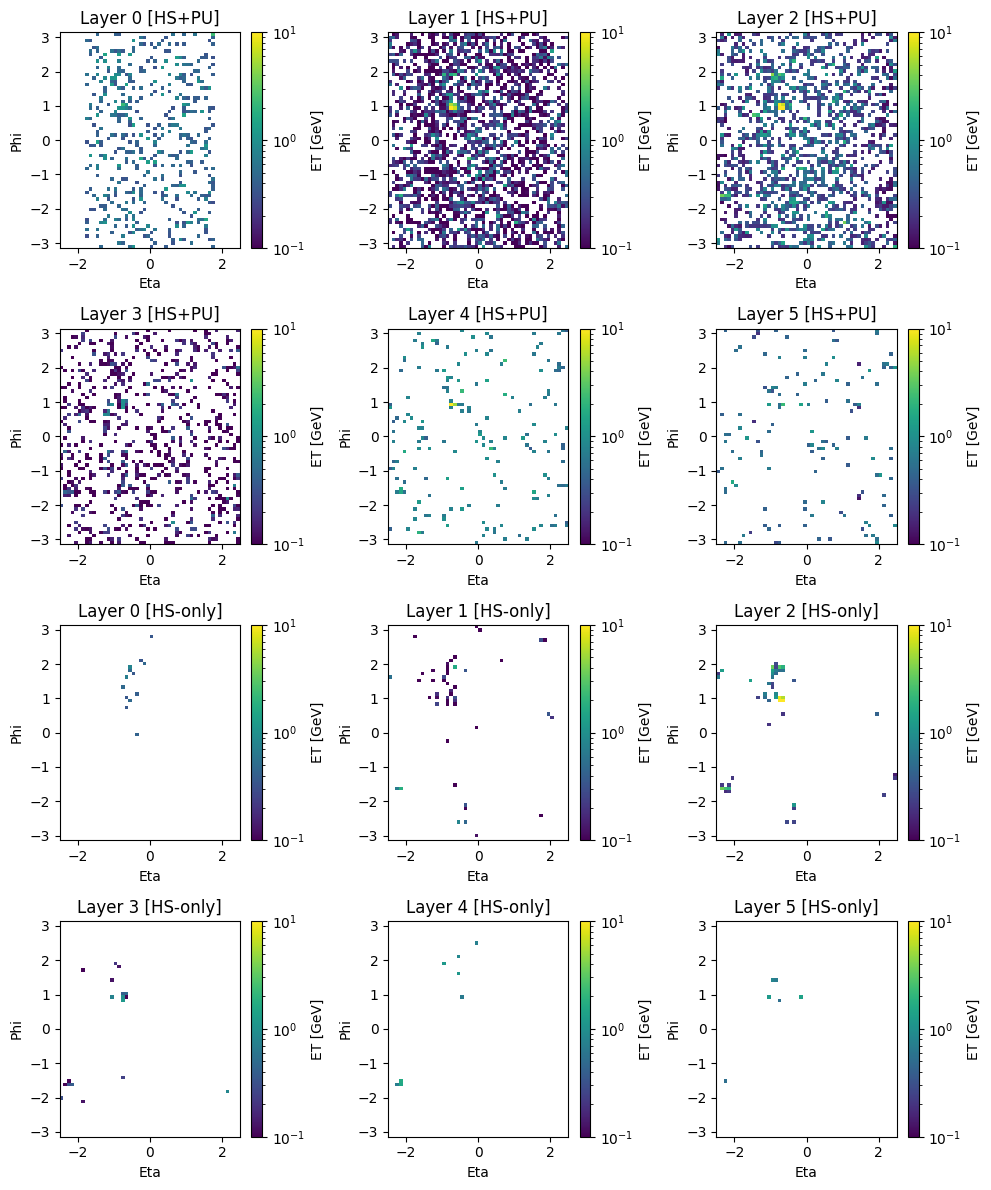

In [4]:
plot_layers(eta_bins, phi_bins, event_idx=1, X_isHS=X_HHbbbb_isHS, X_isPU=X_HHbbbb_isPU, X=None)

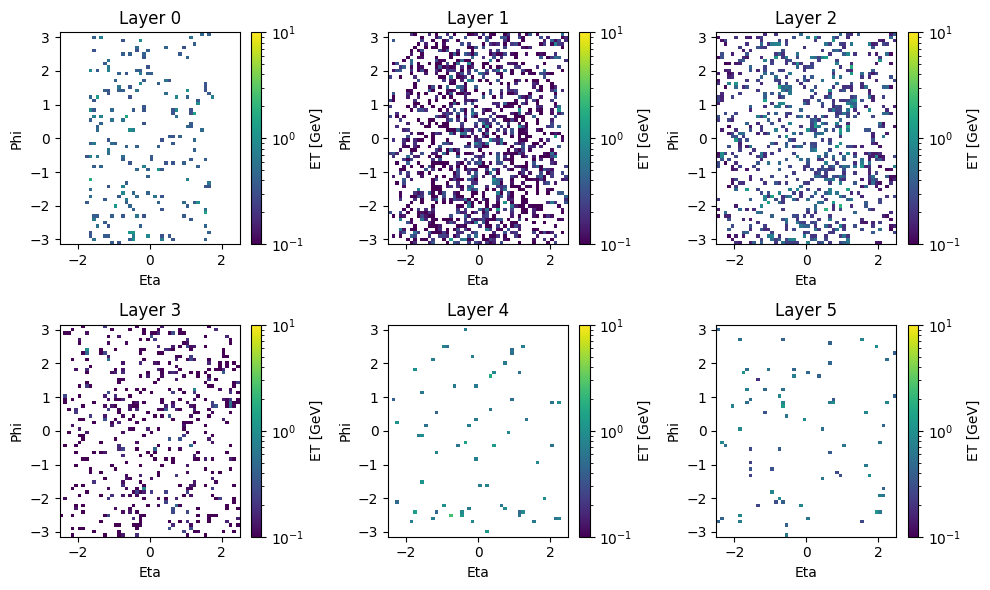

In [5]:
plot_layers(eta_bins, phi_bins, event_idx=1, X_isHS=None, X_isPU=None, X=X_PJZ0)

In [6]:
with h5py.File('HHbbbb.h5', 'w') as f:
    f.create_dataset('HS', data=X_HHbbbb_isHS)
    f.create_dataset('PU', data=X_HHbbbb_isPU)

with h5py.File('PJZ0.h5', 'w') as f:
    f.create_dataset('data', data=X_PJZ0)